<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/diabetes_binary_5050split_health_indicators_BRFSS2015(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

import itertools
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, StratifiedKFold

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import silhouette_score, f1_score , classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.utils.extmath import randomized_range_finder
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/diabetes_binary_5050split_health_indicators_BRFSS2015.csv") #loading the dataset 
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.info() # information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
                                                        
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df)) #the results show that no NaN Values are found

Number of rows before dropping NaNs: 70692
Number of rows after dropping NaNs: 70692


In [ ]:
df['Diabetes_binary'].value_counts() #balanced dataset

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2714e9cad0>,
      dtype=object)

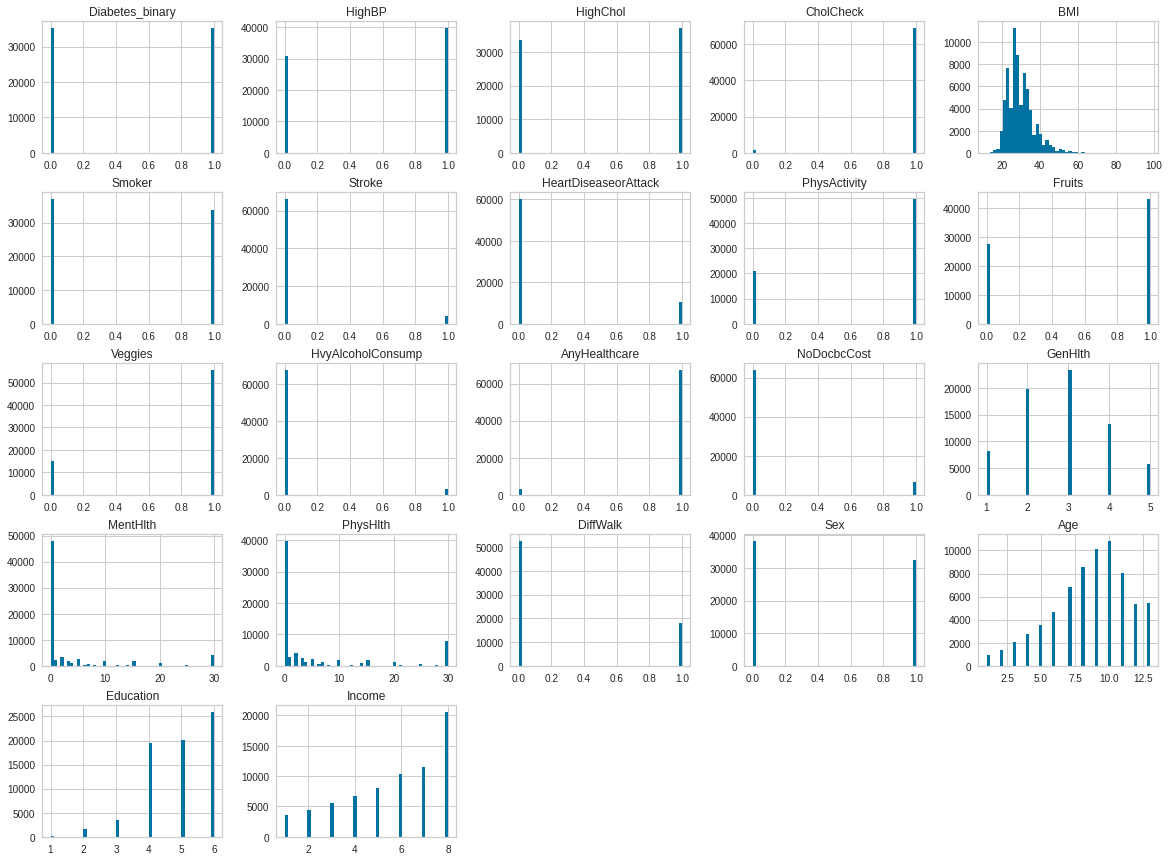

In [ ]:
df.hist(bins=50, figsize=(20,15)) # plotting histograms of all the features of the dataset 

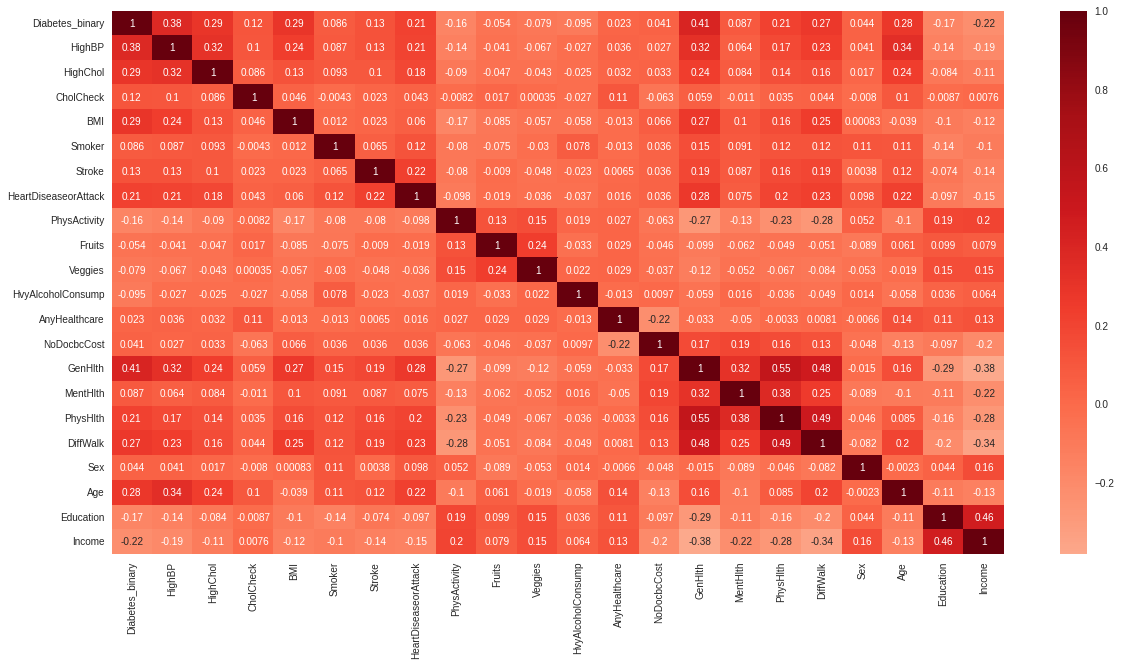

In [ ]:
correlations = df.corr()              #heatmap to show correlaton between features and label variable 
a1, b1 = plt.subplots(figsize=(20, 10))
b1 = sns.heatmap(correlations, annot=True, center=0,  cmap="Reds")

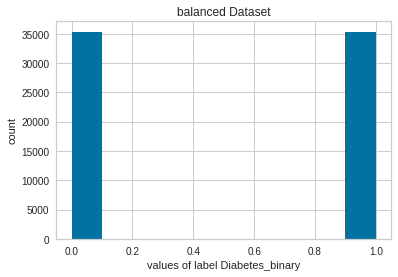

In [ ]:
histogram1=df['Diabetes_binary'].hist() #balanced target variable

fig = histogram1.get_figure()

pl.title("balanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('balanced 3.pdf')

In [ ]:
y=df['Diabetes_binary'].copy()
x=df.drop(['Diabetes_binary'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print ('65% Imbalance \n' ) # number of 1's are 65% of the total lenght of column class 
X1, y1 = make_imbalance(x, y,
                              sampling_strategy={0: 19033, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y1)}')

print ('total number of rows now =', len(y1))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
65% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 19033})
total number of rows now = 54379


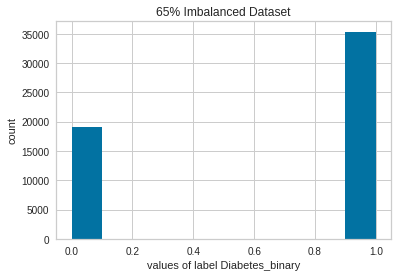

In [ ]:
histogram2=y1.hist() # 65% are 1's

fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 65 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('75% Imbalance \n' ) # number of 1's are 75% of the total lenght of column class 
X2, y2 = make_imbalance(x, y,
                              sampling_strategy={0: 11782, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y2)}')

print ('total number of rows now =', len(y2))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
75% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 11782})
total number of rows now = 47128


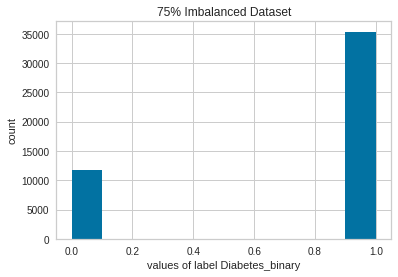

In [ ]:
histogram3=y2.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 75 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('90% Imbalance \n' ) # number of 1's are 90% of the total lenght of column class 
X3, y3 = make_imbalance(x, y,
                              sampling_strategy={0: 3928, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y3)}')

print ('total number of rows now =', len(y3))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
90% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 3928})
total number of rows now = 39274


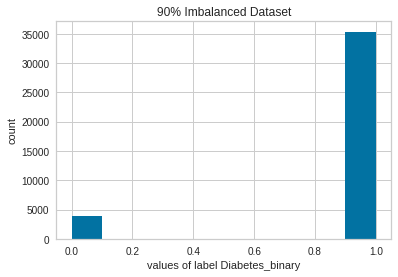

In [ ]:
histogram4=y3.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 90 perc.pdf')

In [ ]:
def method1(d1 ,d2, label_variable):
  

  method1_clf=RandomForestClassifier()                                          # baseline classifier 
  metric=[]                                                                     # array to store measured metric 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x_train,x_test=d1.iloc[train_index],d1.iloc[test_index]                     # 4 surrogates of data are created training and test data 
    y_train,y_test=d2.iloc[train_index],d2.iloc[test_index]
    

    method1_clf.fit(x_train,y_train)                                            # model is fitted with training data 
    prediction=method1_clf.predict(x_test)                                            # model is tested on test data 
    score=f1_score(prediction,y_test)
    metric.append(score)                                                        # scores obtained for 10 iterations are stored in a array 
  
  metric=np.array([metric]) 
  print( "F1 Score for 10 iterations is given by :")                            # metric is converted to numpy array 
  print( metric)     


  print( "Mean F1 Score :")                                                     # All 10 scores for 1 iterations are displayed here 
  print(np.mean(metric))                                                        # mean of 10 scores is diplayed here


  print( "standard Deviation of F1 Score :")
  print(np.std(metric))                                                        # standard deviation of 10 scores is diplayed here
  print("\n")

  result=pd.DataFrame(classification_report(y_test, prediction, output_dict=True)) #classification report is printed here
  display(result)
  print(result.to_latex(index=True))

In [ ]:
method1(x,y,'Diabetes_binary')                                                            # Method1 for original dataset 

F1 Score for 10 iterations is given by :
[[0.74248043 0.73583618 0.75220638 0.73259472 0.75397364 0.74156685
  0.75159582 0.74872209 0.74240967 0.75690309]]
Mean F1 Score :
0.7458288860718354
standard Deviation of F1 Score :
0.007663818307541035




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.770211,0.725668,0.745933,0.747940,0.747937
recall,0.700905,0.790948,0.745933,0.745927,0.745933
f1-score,0.733926,0.756903,0.745933,0.745415,0.745416
support,3534.000000,3535.000000,0.745933,7069.000000,7069.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.770211 &     0.725668 &  0.745933 &     0.747940 &      0.747937 \\
recall    &     0.700905 &     0.790948 &  0.745933 &     0.745927 &      0.745933 \\
f1-score  &     0.733926 &     0.756903 &  0.745933 &     0.745415 &      0.745416 \\
support   &  3534.000000 &  3535.000000 &  0.745933 &  7069.000000 &   7069.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X1, y1,'Diabetes_binary')                                                         # Method1 for 65% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.83607214 0.83451695 0.83270978 0.83397786 0.83675647 0.83974957
  0.83848797 0.84318424 0.83195076 0.84402196]]
Mean F1 Score :
0.8371427705748072
standard Deviation of F1 Score :
0.003965386298715453




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.745672,0.801017,0.785727,0.773344,0.781646
recall,0.588544,0.891907,0.785727,0.740226,0.785727
f1-score,0.657856,0.844022,0.785727,0.750939,0.778862
support,1903.000000,3534.000000,0.785727,5437.000000,5437.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.745672 &     0.801017 &  0.785727 &     0.773344 &      0.781646 \\
recall    &     0.588544 &     0.891907 &  0.785727 &     0.740226 &      0.785727 \\
f1-score  &     0.657856 &     0.844022 &  0.785727 &     0.750939 &      0.778862 \\
support   &  1903.000000 &  3534.000000 &  0.785727 &  5437.000000 &   5437.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X2, y2,'Diabetes_binary')                                                         # Method1 for 75% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.88409487 0.88051495 0.88790323 0.88494867 0.89161773 0.88494867
  0.88740484 0.88545551 0.88487282 0.89067094]]
Mean F1 Score :
0.886243223620558
standard Deviation of F1 Score :
0.0030963469845602045




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.735602,0.843972,0.826401,0.789787,0.816879
recall,0.477080,0.942841,0.826401,0.709960,0.826401
f1-score,0.578785,0.890671,0.826401,0.734728,0.812699
support,1178.000000,3534.000000,0.826401,4712.000000,4712.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.735602 &     0.843972 &  0.826401 &     0.789787 &      0.816879 \\
recall    &     0.477080 &     0.942841 &  0.826401 &     0.709960 &      0.826401 \\
f1-score  &     0.578785 &     0.890671 &  0.826401 &     0.734728 &      0.812699 \\
support   &  1178.000000 &  3534.000000 &  0.826401 &  4712.000000 &   4712.000000 \\
\bottomrule
\end{tabular}



In [ ]:
method1(X3, y3,'Diabetes_binary')                                                         # Method1 for 90% imbalanced dataset 

F1 Score for 10 iterations is given by :
[[0.95068493 0.95111598 0.95025353 0.95140315 0.95722512 0.95393028
  0.95096298 0.95507625 0.9544023  0.95328127]]
Mean F1 Score :
0.952833578716502
standard Deviation of F1 Score :
0.002189702755551665




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.656442,0.924283,0.913165,0.790362,0.897546
recall,0.272959,0.984158,0.913165,0.628559,0.913165
f1-score,0.385586,0.953281,0.913165,0.669433,0.896613
support,392.000000,3535.000000,0.913165,3927.000000,3927.000000


\begin{tabular}{lrrrrr}
\toprule
{} &         0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &    0.656442 &     0.924283 &  0.913165 &     0.790362 &      0.897546 \\
recall    &    0.272959 &     0.984158 &  0.913165 &     0.628559 &      0.913165 \\
f1-score  &    0.385586 &     0.953281 &  0.913165 &     0.669433 &      0.896613 \\
support   &  392.000000 &  3535.000000 &  0.913165 &  3927.000000 &   3927.000000 \\
\bottomrule
\end{tabular}



In [ ]:
def elbowgraph(x):  
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette', timings=True)

  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  viz = SilhouetteVisualizer(model, colors='yellowbrick')
  viz.fit(x)        # Fit the data to the visualizer
  viz.show()        # Finalize and render the figure

  return visualizer.elbow_value_

In [ ]:
def Elbowandsilhoutte(d1 ,d2, label_variable):                                  # Method 2 is implemented here 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(d1,d2)

  for train_index,test_index in skf.split(d1,d2):

    
    x1_train,x1_test=d1.iloc[train_index],d1.iloc[test_index]                   # 4 surrogates of data are created training and test data 
    y1_train,y1_test=d2.iloc[train_index],d2.iloc[test_index]


    scaler = StandardScaler()
    x1_train = scaler.fit_transform(x1_train)
   
    x1_test = scaler.transform(x1_test)
  
    
  k2=elbowgraph(x1_train)
  print("The optimum value of k is ",k2)
  
  




  kmeans = KMeans(n_clusters=k2)                                                # finally K means is applied with optimum value of k 
  kmeans.fit(x1_train)  
  
  labels = kmeans.predict(x1_test)  

  centroids  = kmeans.cluster_centers_                                          # evaluating centroids of clusters 
  cluster=kmeans.labels_

  new_x1_train=pd.DataFrame(x1_train)
  new_x1_train['Cluster_number'] = cluster
  new_x1_train['label_variable']=  y1_train
  new_x1_train.dropna(axis=0,inplace=True)
  


  


  for i in range (len(centroids)) :
     print("Centroid of cluster " + str(i)+ " = " +str(centroids[i,:].mean()))
      
     cls= new_x1_train['label_variable'].loc[(new_x1_train['Cluster_number'] == i) ]
     print(cls.value_counts())
     print("\n\n")

  model1=RandomForestClassifier()
  answer= np.zeros(len(y1_test))
  f1score=[]
  for c in range (len(centroids)):
     cls1= new_x1_train.loc[(new_x1_train['Cluster_number'] == c) ]
     cls1.dropna(subset=['label_variable'],inplace=True)


     
     

     if cls1['label_variable'].nunique() > 1:
        a1=cls1['label_variable']
        a2=cls1.drop(['label_variable', 'Cluster_number'], axis=1)
        model1.fit(a2,a1)                                                       # model is fitted with training data 

        




        for k in range (len(labels)):
          if labels[k]==c:
            answer[k]=model1.predict(np.reshape(x1_test[k],(1,-1)))
     
     f1score.append(f1_score(y1_test,answer))
  for f in range(len(f1score)):
    print("F1 Score on cluster "+ str(f)+ " is given by :"+str(f1score[f]))   
  

  f1score=np.array([f1score])

  print("\n")

  print( "Mean F1 Score :")                                                     
  print(np.mean(f1score))                                                        
  print("\n")

  print("\n")
  print( "standard Deviation of F1 Score :")
  print(np.std(f1score))                                                        # standard deviation of  scores is diplayed here
  print("\n")
                                                         
  result=pd.DataFrame(classification_report(y1_test, answer, output_dict=True))
  display(result)
  print(result.to_latex(index=True))

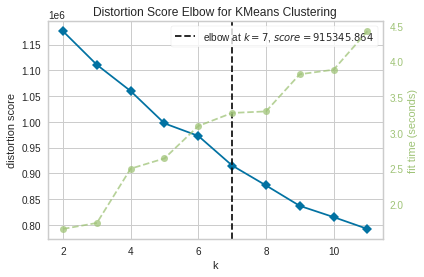

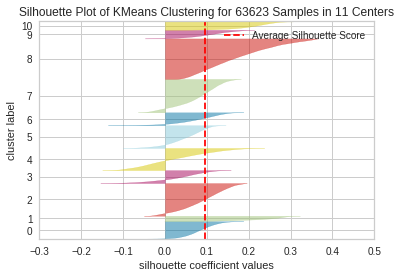

The optimum value of k is  7
Centroid of cluster 0 = 0.2454886545805529
1.0    2729
0.0    1518
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.2016462164775087
0.0    15624
1.0     3286
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.37563609673535603
1.0    2538
0.0     934
Name: label_variable, dtype: int64



Centroid of cluster 3 = 0.01859909801612526
1.0    10934
0.0     7790
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.12780286164306284
1.0    7077
0.0    2534
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.18131855275591388
0.0    1888
1.0     612
Name: label_variable, dtype: int64



Centroid of cluster 6 = -0.2995247554360955
0.0    1524
1.0    1101
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.1755184623166414
F1 Score on cluster 1 is given by :0.199317738791423
F1 Score on cluster 2 is given by :0.3043380534951674
F1 Score on cluster 3 is given by :0.5572872067134783
F1 Score on cluster 4 is given by :0.7352229027204102
F1 Score on cluster 5 is given by :0.7396524932900127
F1 Score on cluster 6 is given by :0.7457863212146539


Mean F1 Score :
0.49387473979168384




standard Deviation of F1 Score :
0.24206697047900483




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.749489,0.734632,0.741831,0.742061,0.742060
recall,0.726372,0.757284,0.741831,0.741828,0.741831
f1-score,0.737750,0.745786,0.741831,0.741768,0.741769
support,3534.000000,3535.000000,0.741831,7069.000000,7069.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.749489 &     0.734632 &  0.741831 &     0.742061 &      0.742060 \\
recall    &     0.726372 &     0.757284 &  0.741831 &     0.741828 &      0.741831 \\
f1-score  &     0.737750 &     0.745786 &  0.741831 &     0.741768 &      0.741769 \\
support   &  3534.000000 &  3535.000000 &  0.741831 &  7069.000000 &   7069.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(x,y,'Diabetes_binary')      # Method 2 on Original version of dataset 

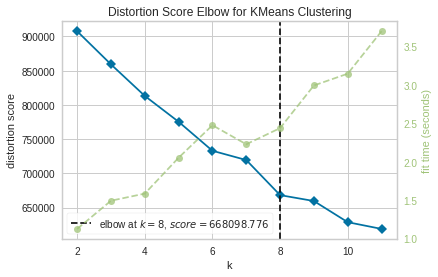

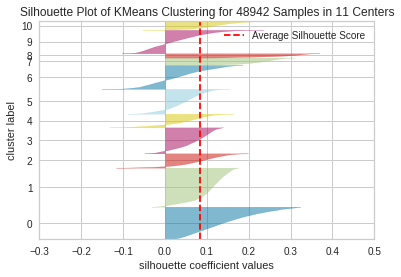

The optimum value of k is  8
Centroid of cluster 0 = -0.5016772542081758
0.0    735
1.0    209
Name: label_variable, dtype: int64



Centroid of cluster 1 = -0.11587340764234366
1.0    6750
0.0    1839
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.21660905174163606
0.0    958
1.0    680
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.25461712168719874
1.0    1125
0.0     703
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.34734000242827745
1.0    2588
0.0     467
Name: label_variable, dtype: int64



Centroid of cluster 5 = 0.24228706078122558
1.0    6076
0.0    1107
Name: label_variable, dtype: int64



Centroid of cluster 6 = -0.19560456333218795
0.0    7965
1.0    3590
Name: label_variable, dtype: int64



Centroid of cluster 7 = 0.07858752613701354
1.0    8891
0.0    3356
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.004510854243022272
F1 Score on cluster 1 is given by :0.3511957484499557
F1 Score on cluster 2 is given by :0.37064459930313587
F1 Score on cluster 3 is given by :0.4056623705894781
F1 Score on cluster 4 is given by :0.5043069694596711
F1 Score on cluster 5 is given by :0.6768344348415523
F1 Score on cluster 6 is given by :0.7008051529790661
F1 Score on cluster 7 is given by :0.8389189189189189


Mean F1 Score :
0.48160988109810005




standard Deviation of F1 Score :
0.24419683286862978




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.726289,0.802897,0.780761,0.764593,0.776084
recall,0.599580,0.878325,0.780761,0.738952,0.780761
f1-score,0.656880,0.838919,0.780761,0.747899,0.775204
support,1903.000000,3534.000000,0.780761,5437.000000,5437.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.726289 &     0.802897 &  0.780761 &     0.764593 &      0.776084 \\
recall    &     0.599580 &     0.878325 &  0.780761 &     0.738952 &      0.780761 \\
f1-score  &     0.656880 &     0.838919 &  0.780761 &     0.747899 &      0.775204 \\
support   &  1903.000000 &  3534.000000 &  0.780761 &  5437.000000 &   5437.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X1, y1,'Diabetes_binary')  # Method 2 on 65% imbalanced version of dataset 

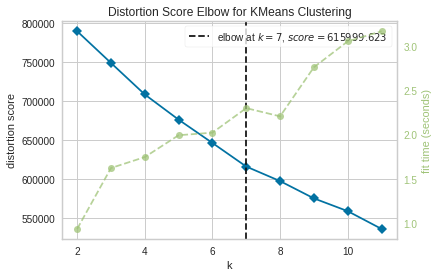

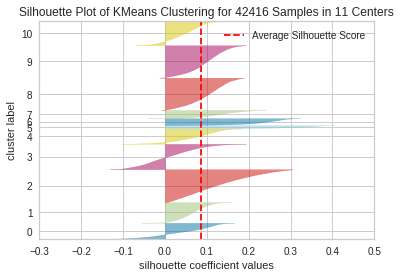

The optimum value of k is  7
Centroid of cluster 0 = 0.2504155794309829
1.0    7928
0.0     788
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.23424952760184486
1.0    709
0.0    597
Name: label_variable, dtype: int64



Centroid of cluster 2 = -0.18516068484544687
0.0    5117
1.0    4222
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.13993907085527033
1.0    4902
0.0    1018
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.05842227960332303
1.0    11509
0.0     2213
Name: label_variable, dtype: int64



Centroid of cluster 5 = -0.25613591327562496
1.0    1149
0.0     420
Name: label_variable, dtype: int64



Centroid of cluster 6 = -0.5420663493540685
0.0    451
1.0    215
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.40486187845303867
F1 Score on cluster 1 is given by :0.4268740548714625
F1 Score on cluster 2 is given by :0.5135135135135136
F1 Score on cluster 3 is given by :0.6454418928322896
F1 Score on cluster 4 is given by :0.8707818930041152
F1 Score on cluster 5 is given by :0.8867340067340066
F1 Score on cluster 6 is given by :0.8881118881118881


Mean F1 Score :
0.6623313039314735




standard Deviation of F1 Score :
0.20317047783500403




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.713580,0.846233,0.82343,0.779906,0.813070
recall,0.490662,0.934352,0.82343,0.712507,0.823430
f1-score,0.581489,0.888112,0.82343,0.734800,0.811456
support,1178.000000,3534.000000,0.82343,4712.000000,4712.000000


\begin{tabular}{lrrrrr}
\toprule
{} &          0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &     0.713580 &     0.846233 &   0.82343 &     0.779906 &      0.813070 \\
recall    &     0.490662 &     0.934352 &   0.82343 &     0.712507 &      0.823430 \\
f1-score  &     0.581489 &     0.888112 &   0.82343 &     0.734800 &      0.811456 \\
support   &  1178.000000 &  3534.000000 &   0.82343 &  4712.000000 &   4712.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X2, y2,'Diabetes_binary') # Method 2 on 75% imbalanced version of dataset 

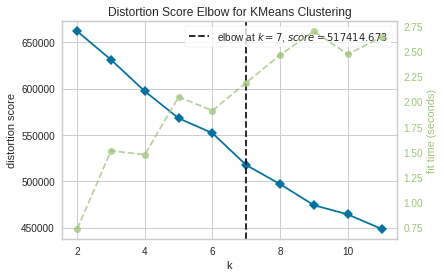

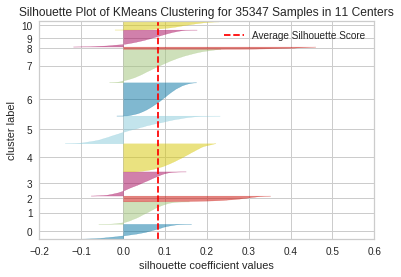

The optimum value of k is  7
Centroid of cluster 0 = -0.15832035716454815
1.0    4639
0.0     333
Name: label_variable, dtype: int64



Centroid of cluster 1 = 0.17650413826168984
1.0    7100
0.0     251
Name: label_variable, dtype: int64



Centroid of cluster 2 = 0.03150280203962176
1.0    10683
0.0      775
Name: label_variable, dtype: int64



Centroid of cluster 3 = -0.17284728699578894
1.0    4827
0.0    1801
Name: label_variable, dtype: int64



Centroid of cluster 4 = 0.29882538483942767
1.0    2731
0.0      78
Name: label_variable, dtype: int64



Centroid of cluster 5 = -0.24810844918931116
1.0    1220
0.0     147
Name: label_variable, dtype: int64



Centroid of cluster 6 = -0.6110611565297367
1.0    219
0.0    151
Name: label_variable, dtype: int64





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

F1 Score on cluster 0 is given by :0.2517140058765916
F1 Score on cluster 1 is given by :0.5345284171929109
F1 Score on cluster 2 is given by :0.8117343649258543
F1 Score on cluster 3 is given by :0.886534216335541
F1 Score on cluster 4 is given by :0.936808182709822
F1 Score on cluster 5 is given by :0.9533095303488053
F1 Score on cluster 6 is given by :0.9545454545454546


Mean F1 Score :
0.7613105959907115




standard Deviation of F1 Score :
0.2490969567806461




,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.689873,0.924914,0.915457,0.807394,0.901452
recall,0.278061,0.986139,0.915457,0.632100,0.915457
f1-score,0.396364,0.954545,0.915457,0.675455,0.898827
support,392.000000,3535.000000,0.915457,3927.000000,3927.000000


\begin{tabular}{lrrrrr}
\toprule
{} &         0.0 &          1.0 &  accuracy &    macro avg &  weighted avg \\
\midrule
precision &    0.689873 &     0.924914 &  0.915457 &     0.807394 &      0.901452 \\
recall    &    0.278061 &     0.986139 &  0.915457 &     0.632100 &      0.915457 \\
f1-score  &    0.396364 &     0.954545 &  0.915457 &     0.675455 &      0.898827 \\
support   &  392.000000 &  3535.000000 &  0.915457 &  3927.000000 &   3927.000000 \\
\bottomrule
\end{tabular}



In [ ]:
Elbowandsilhoutte(X3, y3,'Diabetes_binary') # Method 2 on 90% imbalanced version of dataset 